In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countrys = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    c = citipy.nearest_city(lat_lng[0], lat_lng[1])
    country = c.country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countrys.append(country)
# Print the city count to confirm sufficient count
print(len(cities))

615


In [3]:
len(countrys)

615

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
response = requests.get(query_url+ "sunnyside").json()

In [6]:
print(response)

{'coord': {'lon': -53.92, 'lat': 47.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 6.39, 'pressure': 1024, 'humidity': 36, 'temp_min': 6.11, 'temp_max': 6.67}, 'wind': {'speed': 2.853, 'deg': 261}, 'clouds': {'all': 2}, 'dt': 1570413080, 'sys': {'type': 3, 'id': 2002737, 'country': 'CA', 'sunrise': 1570354874, 'sunset': 1570395975}, 'timezone': -9000, 'id': 6159599, 'name': 'Sunnyside', 'cod': 200}


In [7]:
import pyowm

In [8]:
owm = pyowm.OWM('0ee6cdb04feec028b3a20a5482451035')

#observation = owm.weather_at_place("Phoenix")
#weather = observation.get_weather()
#print(weather)

In [9]:
new_city = []
new_country = []
temp = []
humidity = []
windspeed = []
longitude = []
latitude = []
datetime = []
clouds = []

def create_Data(x):
    observation = owm.weather_at_place(cities[x])
    weather = observation.get_weather()
    loc = observation.get_location()
    w = weather.get_wind()["speed"]
    t = weather.get_temperature("fahrenheit")["temp_max"]
    h = weather.get_humidity()
    lo = loc.get_lon()
    la = loc.get_lat()
    d = weather.get_reference_time(timeformat='date')
    c = weather.get_clouds()
    datetime.append(d)
    new_city.append(cities[x])
    new_country.append(countrys[x])
    windspeed.append(w)
    humidity.append(h)
    temp.append(t)
    longitude.append(lo)
    latitude.append(la)
    clouds.append(c)
    
    return()

In [10]:
import pyowm
count = 0
set_count = 1
for x in range(len(cities)):   
    try:
        create_Data(x)

        if (count < 49):

                #count = 0
                #new_city.append(city)


                
                print(f" Processing Record {count} of the Set {set_count} : {cities[x]}")
                count += 1
        else:
                count = 0
                set_count +=1
                count += 1
                #new_city.append(city)
    except:
        print(f"City not found. Skipping...{count}")
print("-----------Data Collection Complete------------")

 Processing Record 0 of the Set 1 : albany
 Processing Record 1 of the Set 1 : ushuaia
 Processing Record 2 of the Set 1 : busselton
 Processing Record 3 of the Set 1 : karasuyama
City not found. Skipping...4
 Processing Record 4 of the Set 1 : rikitea
 Processing Record 5 of the Set 1 : najran
 Processing Record 6 of the Set 1 : barcelos
 Processing Record 7 of the Set 1 : sambava
 Processing Record 8 of the Set 1 : saint-philippe
 Processing Record 9 of the Set 1 : rawson
 Processing Record 10 of the Set 1 : maniitsoq
 Processing Record 11 of the Set 1 : qaanaaq
 Processing Record 12 of the Set 1 : barrow
 Processing Record 13 of the Set 1 : puerto ayora
 Processing Record 14 of the Set 1 : mahebourg
City not found. Skipping...15
 Processing Record 15 of the Set 1 : yulara
 Processing Record 16 of the Set 1 : mangrol
 Processing Record 17 of the Set 1 : saint george
 Processing Record 18 of the Set 1 : paamiut
 Processing Record 19 of the Set 1 : turayf
 Processing Record 20 of the S

 Processing Record 22 of the Set 4 : krasnik
 Processing Record 23 of the Set 4 : oranjemund
 Processing Record 24 of the Set 4 : caravelas
 Processing Record 25 of the Set 4 : atuona
 Processing Record 26 of the Set 4 : lavrentiya
City not found. Skipping...27
 Processing Record 27 of the Set 4 : devils lake
 Processing Record 28 of the Set 4 : zhangye
 Processing Record 29 of the Set 4 : rexburg
City not found. Skipping...30
 Processing Record 30 of the Set 4 : vardo
 Processing Record 31 of the Set 4 : dingle
 Processing Record 32 of the Set 4 : taoudenni
 Processing Record 33 of the Set 4 : wanaka
 Processing Record 34 of the Set 4 : east london
 Processing Record 35 of the Set 4 : port hedland
 Processing Record 36 of the Set 4 : yar-sale
 Processing Record 37 of the Set 4 : kattivakkam
 Processing Record 38 of the Set 4 : abha
 Processing Record 39 of the Set 4 : itarema
 Processing Record 40 of the Set 4 : esmeraldas
City not found. Skipping...41
 Processing Record 41 of the Set

 Processing Record 38 of the Set 7 : boyabat
 Processing Record 39 of the Set 7 : sisophon
City not found. Skipping...40
 Processing Record 40 of the Set 7 : icod de los vinos
City not found. Skipping...41
 Processing Record 41 of the Set 7 : makakilo city
 Processing Record 42 of the Set 7 : mincivan
City not found. Skipping...43
 Processing Record 43 of the Set 7 : souillac
 Processing Record 44 of the Set 7 : namibe
 Processing Record 45 of the Set 7 : melfi
 Processing Record 46 of the Set 7 : camopi
 Processing Record 47 of the Set 7 : artesia
 Processing Record 48 of the Set 7 : matsuura
 Processing Record 1 of the Set 8 : monrovia
 Processing Record 2 of the Set 8 : meulaboh
 Processing Record 3 of the Set 8 : lodwar
 Processing Record 4 of the Set 8 : pshekhskaya
City not found. Skipping...5
 Processing Record 5 of the Set 8 : chuzhou
 Processing Record 6 of the Set 8 : kamarion
City not found. Skipping...7
 Processing Record 7 of the Set 8 : stryn
 Processing Record 8 of the S

 Processing Record 11 of the Set 11 : te anau
 Processing Record 12 of the Set 11 : north bend
 Processing Record 13 of the Set 11 : podor
 Processing Record 14 of the Set 11 : vanimo
 Processing Record 15 of the Set 11 : ginir
 Processing Record 16 of the Set 11 : mauguio
 Processing Record 17 of the Set 11 : hamilton
 Processing Record 18 of the Set 11 : saint-francois
 Processing Record 19 of the Set 11 : jiexiu
 Processing Record 20 of the Set 11 : xam nua
 Processing Record 21 of the Set 11 : griffith
 Processing Record 22 of the Set 11 : santa maria
 Processing Record 23 of the Set 11 : kodinsk
 Processing Record 24 of the Set 11 : shubarshi
 Processing Record 25 of the Set 11 : novo aripuana
 Processing Record 26 of the Set 11 : kumluca
 Processing Record 27 of the Set 11 : devonport
 Processing Record 28 of the Set 11 : uvat
 Processing Record 29 of the Set 11 : garowe
 Processing Record 30 of the Set 11 : gazli
 Processing Record 31 of the Set 11 : pacajus
 Processing Record 3

In [11]:
API_DF = pd.DataFrame({"City": new_city,
                      "Country ID" : new_country,
                      "Date": datetime,
                      "Cloudiness": clouds,
                      "Humidity": humidity,
                      "Lat": longitude,
                      "Lon": latitude,
                      "Max_temp": temp,
                      "Wind Speed": windspeed})


In [12]:
API_DF

City Country ID                       Date  Cloudiness  Humidity  \
0         albany         au  2019-10-07 01:52:04+00:00          90        77   
1        ushuaia         ar  2019-10-07 01:57:48+00:00          65        90   
2      busselton         au  2019-10-07 01:51:57+00:00           3        59   
3     karasuyama         jp  2019-10-07 01:57:49+00:00          75        72   
4        rikitea         pf  2019-10-07 01:57:50+00:00         100        86   
..           ...        ...                        ...         ...       ...   
539       mortka         ru  2019-10-07 02:01:38+00:00          97        95   
540  oktyabrskiy         ru  2019-10-07 02:01:38+00:00          90        91   
541       kholuy         ru  2019-10-07 02:01:39+00:00         100       100   
542        altay         cn  2019-10-07 02:01:39+00:00           0        23   
543          soe         id  2019-10-07 02:01:39+00:00          20        96   

        Lat    Lon  Max_temp  Wind Speed  
0    -73.75  42.65     66.20       6.700  
1    -68.31 -54.81     28.00       3.030  
2    115.35 -33.64     66.99       1.340  
3    140.15  36.65     80.01       2.600  
4   -134.97 -23.12     73.74       5.060  
..      ...    ...       ...         ...  
539   66.02  59.33     45.32       1.954  
540   37.97  55.61     35.60       7.000  
541   41.87  56.58     34.34       3.030  
542   88.13  47.83     53.96       1.270  
543   26.05  57.91     33.80       2.100  

[544 rows x 9 columns]

In [13]:
API_DF["Country ID"].value_counts()

ru    79
us    48
br    30
ca    29
au    22
      ..
sj     1
jm     1
ck     1
bb     1
ge     1
Name: Country ID, Length: 112, dtype: int64

In [14]:
API_DF.info()
API_DF.to_csv("output.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 9 columns):
City          544 non-null object
Country ID    544 non-null object
Date          544 non-null object
Cloudiness    544 non-null int64
Humidity      544 non-null int64
Lat           544 non-null float64
Lon           544 non-null float64
Max_temp      544 non-null float64
Wind Speed    544 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 38.4+ KB


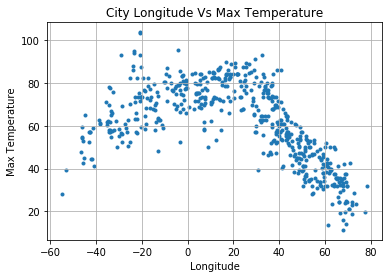

In [15]:
def longitude_vs_max_temp():
    plt.scatter(API_DF["Lon"], API_DF["Max_temp"], marker=".")
    plt.xlabel("Longitude")
    plt.ylabel("Max Temperature")
    plt.title("City Longitude Vs Max Temperature")
    plt.grid()
longitude_vs_max_temp()

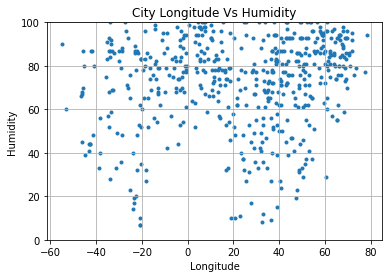

In [16]:
def longitude_vs_Humidity():
    plt.scatter(API_DF["Lon"], API_DF["Humidity"], marker=".")
    plt.xlabel("Longitude")
    plt.ylabel("Humidity")
    plt.title("City Longitude Vs Humidity")
    plt.grid()
    plt.ylim(0,100)
longitude_vs_Humidity()

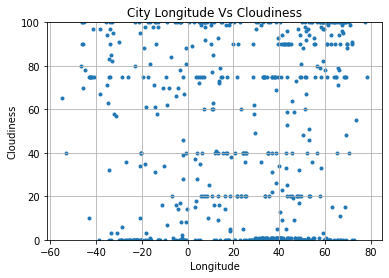

In [17]:
def longitude_vs_Cloudiness():
    plt.scatter(API_DF["Lon"], API_DF["Cloudiness"], marker=".")
    plt.xlabel("Longitude")
    plt.ylabel("Cloudiness")
    plt.title("City Longitude Vs Cloudiness")
    plt.grid()
    plt.ylim(0,100)
longitude_vs_Cloudiness()

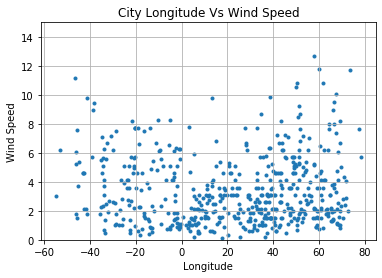

In [20]:
def longitude_vs_Wind_Speed():
    plt.scatter(API_DF["Lon"], API_DF["Wind Speed"], marker=".")
    plt.xlabel("Longitude")
    plt.ylabel("Wind Speed")
    plt.title("City Longitude Vs Wind Speed")
    plt.grid()
    plt.ylim(0,15)
longitude_vs_Wind_Speed()